Welcome to Sigma Cab Private Limited - a cab aggregator service. Their customers can download their app on smartphones and book a cab from any where in the cities they operate in. They, in turn search for cabs from various service providers and provide the best option to their client across available options. They have been in operation for little less than a year now. During this period, they have captured surge_pricing_type from the service providers.

You have been hired by Sigma Cabs as a Data Scientist and have been asked to build a predictive model, which could help them in predicting the surge_pricing_type pro-actively. This would in turn help them in matching the right cabs with the right customers quickly and efficiently.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("train_Wc8LBpr.csv")
df_test = pd.read_csv("test_VsU9xXK.csv")

In [3]:
df.shape

(131662, 14)

In [6]:
df_test.shape

(87395, 13)

In [4]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [7]:
df_test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [79]:
df.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
count,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.015912,2.802064,2.849458,0.782838,51.202800,75.099019,2.155747
std,25.522882,3.544411,0.207760,0.980675,1.037559,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.687952,2.152500,0.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.802064,2.895000,0.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.912815,3.582500,1.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,124.000000,206.000000,3.000000


### Cleaning Data

In [10]:
df.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [12]:
df_test.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

<AxesSubplot:>

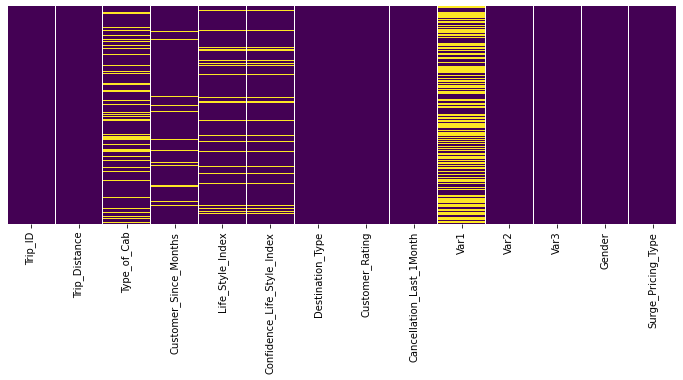

In [13]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
df['Type_of_Cab'].value_counts()

B    31136
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64

In [15]:
df["Type_of_Cab"].isna().sum() / df.shape[0]*100

15.349911136090899

In [24]:
df["Type_of_Cab"].mode()

0    B
dtype: object

In [25]:
df["Customer_Since_Months"].isnull().sum() / df.shape[0]*100

4.496361896371011

In [26]:
df["Customer_Since_Months"].value_counts()

10.0    42680
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
6.0      7375
8.0      6328
9.0      5147
Name: Customer_Since_Months, dtype: int64

In [27]:
df["Customer_Since_Months"].median()

6.0

In [28]:
df["Life_Style_Index"].isna().sum() / df.shape[0]*100

15.336999286050645

In [30]:
df["Life_Style_Index"].value_counts()

2.70697    14
2.77608    14
2.78465    13
2.69489    12
2.77447    12
           ..
2.64184     1
2.97707     1
2.90484     1
3.19257     1
2.10775     1
Name: Life_Style_Index, Length: 55978, dtype: int64

In [29]:
df["Life_Style_Index"].mean()

2.8020639999461827

In [31]:
df["Confidence_Life_Style_Index"].isna().sum() / df.shape[0]*100

15.336999286050645

In [32]:
df["Confidence_Life_Style_Index"].value_counts()

B    40355
C    35967
A    35147
Name: Confidence_Life_Style_Index, dtype: int64

In [33]:
df["Confidence_Life_Style_Index"].mode()

0    B
dtype: object

In [34]:
df["Customer_Since_Months"].fillna(df["Customer_Since_Months"].median(), axis=0, inplace=True)
df["Type_of_Cab"].fillna('B', axis='rows', inplace=True)
df["Life_Style_Index"].fillna(df["Life_Style_Index"].mean(), axis=0, inplace=True)
df["Confidence_Life_Style_Index"].fillna('B', axis=0, inplace=True)

In [35]:
df.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months              0
Life_Style_Index                   0
Confidence_Life_Style_Index        0
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [36]:
df_test["Customer_Since_Months"].fillna(df_test["Customer_Since_Months"].median(), axis=0, inplace=True)
df_test["Type_of_Cab"].fillna('B', axis='rows', inplace=True)
df_test["Life_Style_Index"].fillna(df_test["Life_Style_Index"].mean(), axis=0, inplace=True)
df_test["Confidence_Life_Style_Index"].fillna('B', axis=0, inplace=True)

In [37]:
df_test.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months              0
Life_Style_Index                   0
Confidence_Life_Style_Index        0
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [38]:
df.drop(['Var1','Trip_ID'],axis=1,inplace=True)

In [39]:
df_test.drop(['Var1','Trip_ID'],axis=1,inplace=True)

In [40]:
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.427690,A,A,3.90500,0,46,60,Female,2
1,29.47,B,10.0,2.782450,B,A,3.45000,0,56,78,Male,2
2,41.58,B,10.0,2.802064,B,E,3.50125,2,56,77,Male,2
3,61.56,C,10.0,2.802064,B,A,3.45375,0,52,74,Male,3
4,54.95,C,10.0,3.034530,B,A,3.40250,4,49,102,Male,2


<AxesSubplot:>

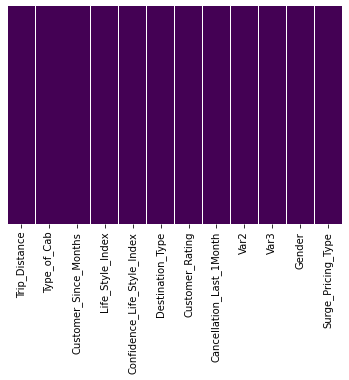

In [41]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
df_test.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender
0,9.44,A,10.0,2.57438,A,B,3.68000,2,46,63,Male
1,32.15,B,10.0,2.85143,A,A,1.59375,0,49,80,Female
2,10.38,C,4.0,2.70530,A,D,4.50500,0,47,74,Male
3,14.94,B,6.0,2.48159,C,E,4.53000,0,43,54,Male
4,32.03,B,7.0,2.81598,A,K,4.60125,3,44,56,Male


## EDA

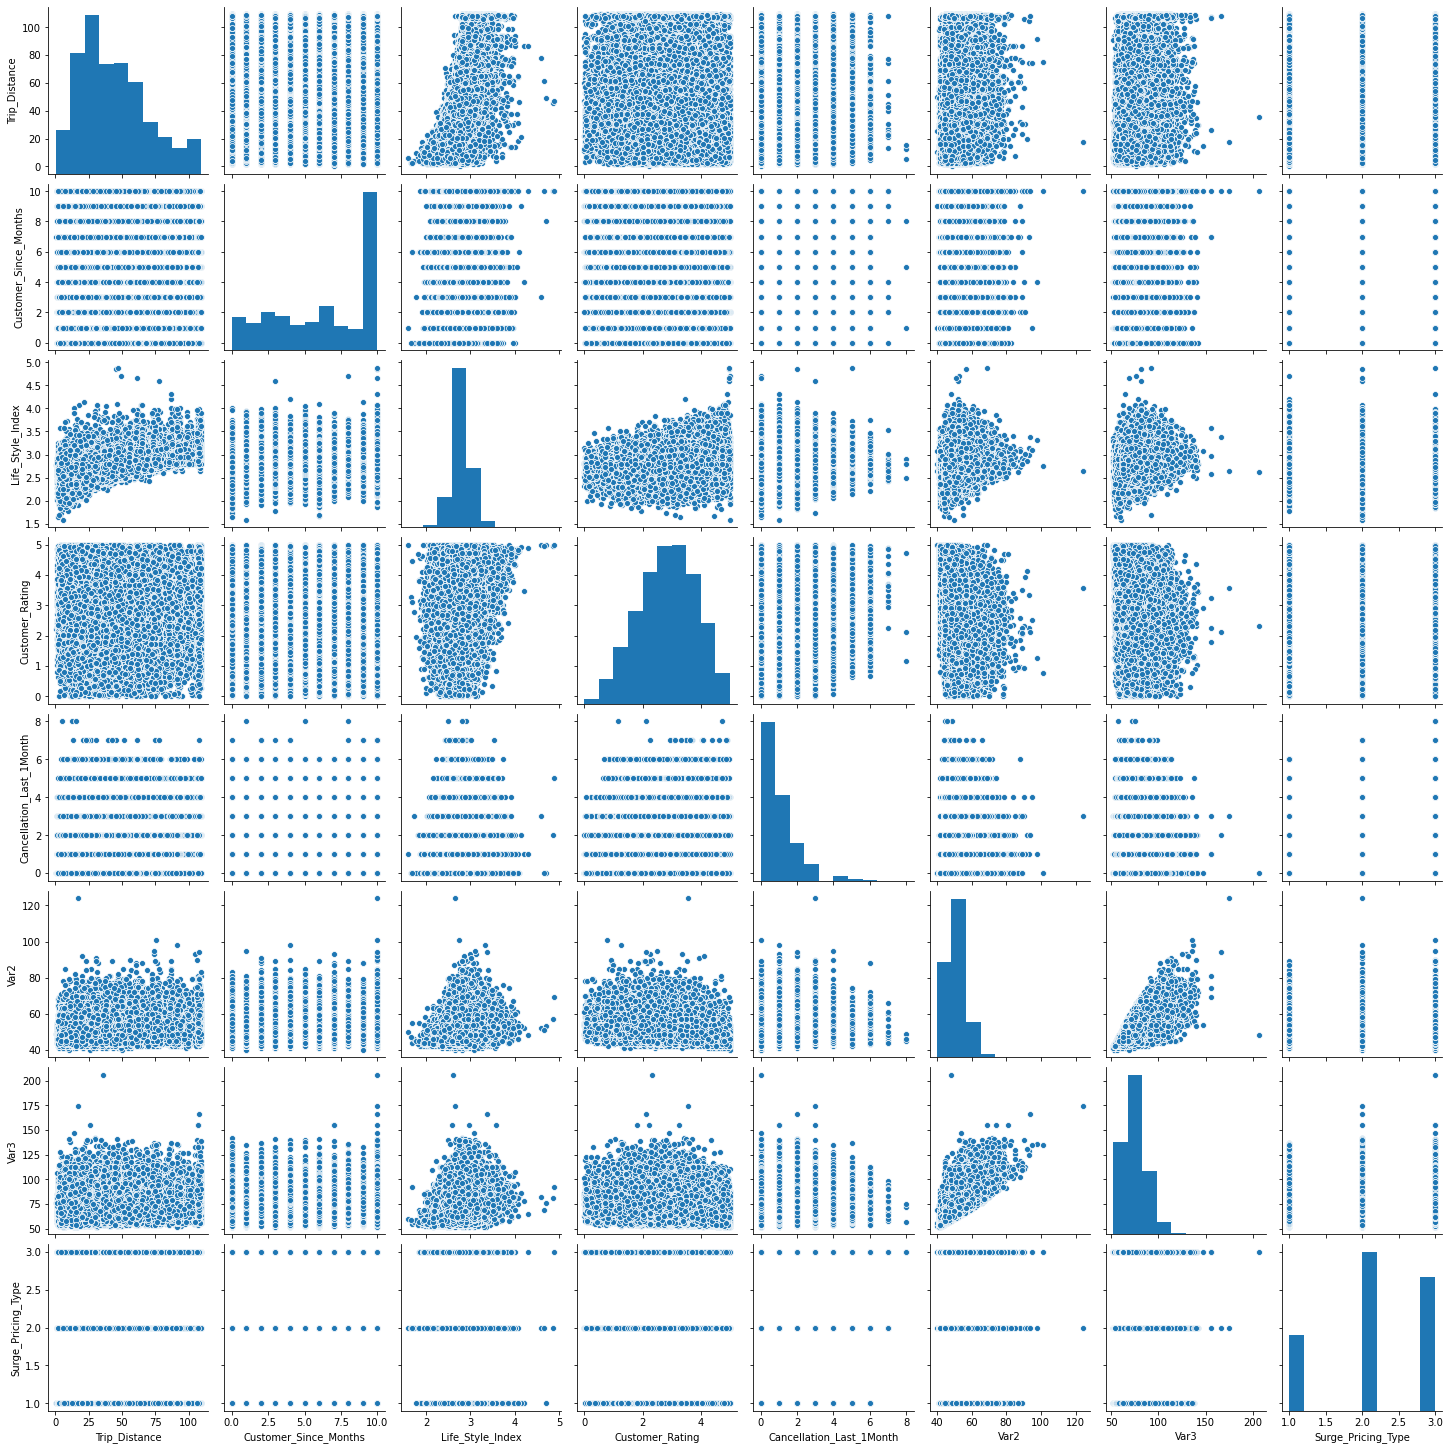

In [43]:
sns.pairplot(df)

<AxesSubplot:>

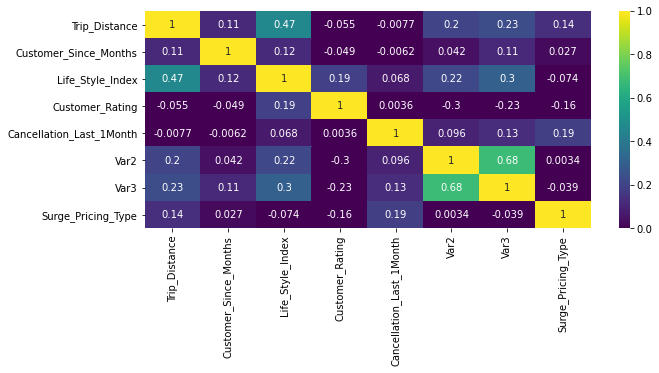

In [44]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),vmin=0, vmax=1, annot=True, cmap='viridis')

<AxesSubplot:xlabel='Surge_Pricing_Type', ylabel='count'>

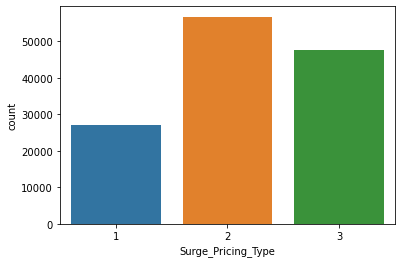

In [47]:
sns.countplot(df['Surge_Pricing_Type'])

#### Outliers detection

(array([  615.,  2490.,  4212.,  5391.,  7816.,  7123.,  7882.,  6116.,
        12676.,  6821.,  7369.,  4254.,  9014.,  5814.,  3784.,  4214.,
         6396.,  4810.,  2255.,  1899.,  4439.,  2848.,   965.,  2393.,
         1070.,  2570.,   581.,   618.,   385.,  4842.]),
 array([  0.31      ,   3.94066667,   7.57133333,  11.202     ,
         14.83266667,  18.46333333,  22.094     ,  25.72466667,
         29.35533333,  32.986     ,  36.61666667,  40.24733333,
         43.878     ,  47.50866667,  51.13933333,  54.77      ,
         58.40066667,  62.03133333,  65.662     ,  69.29266667,
         72.92333333,  76.554     ,  80.18466667,  83.81533333,
         87.446     ,  91.07666667,  94.70733333,  98.338     ,
        101.96866667, 105.59933333, 109.23      ]),
 <BarContainer object of 30 artists>)

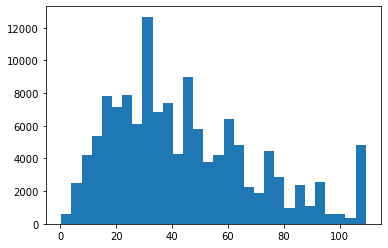

In [56]:
plt.hist(df['Trip_Distance'], bins=30)

(array([2.8000e+01, 4.8600e+02, 5.0650e+03, 6.0230e+03, 8.7150e+03,
        2.2357e+04, 1.2445e+04, 2.3006e+04, 9.8370e+03, 8.5540e+03,
        1.2781e+04, 4.7590e+03, 6.7950e+03, 2.4280e+03, 1.8600e+03,
        2.6440e+03, 9.1900e+02, 1.2510e+03, 3.7600e+02, 2.8500e+02,
        4.1000e+02, 1.2700e+02, 1.8100e+02, 6.4000e+01, 4.5000e+01,
        8.9000e+01, 2.7000e+01, 4.8000e+01, 9.0000e+00, 9.0000e+00,
        9.0000e+00, 4.0000e+00, 5.0000e+00, 1.0000e+00, 4.0000e+00,
        7.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 40. ,  41.4,  42.8,  44.2,  45.6,  47. ,  48.4,  49.8,  51.2,
         52.6,  54. ,  55.4,  56.8,  58.2,  59.6,  61. ,  62.4,  63.8,
         65.2,  66.6,  68. ,  69.4,  70.

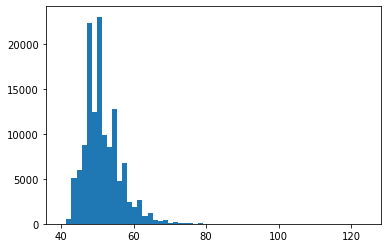

In [67]:
plt.hist(df['Var2'], bins=60)

(array([2.0000e+00, 3.0000e+00, 4.0000e+00, 1.8000e+01, 5.5000e+01,
        1.1700e+02, 2.5300e+02, 5.0200e+02, 1.0190e+03, 2.5390e+03,
        4.6380e+03, 7.4690e+03, 1.2830e+04, 1.5469e+04, 3.6722e+04,
        1.6467e+04, 1.2248e+04, 8.9600e+03, 6.0290e+03, 2.9790e+03,
        1.6250e+03, 8.5500e+02, 3.7400e+02, 1.9400e+02, 1.1400e+02,
        7.6000e+01, 3.4000e+01, 2.6000e+01, 2.0000e+01, 8.0000e+00,
        6.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([1.59638   , 1.67834825, 1.7603165 , 1.84228475, 1.924253  ,
        2.00622125, 2.0881895 , 2.17015775, 2.252126  , 2.33409425,
        2.4160625 , 2.49803075, 2.579999  , 2.66196725, 2.7439355 ,
        2.82590375, 2.907872  , 2.98984025, 3.0718085 , 3.15377675,
        3.235745  , 3.31771325, 3.3996815 , 3.48164975, 3.563618  ,
        3.64558625, 3.7275545 , 3.80952275, 3.891491  , 3.97345925,
        4.0554275 , 4.13739575, 4.219364  , 4.

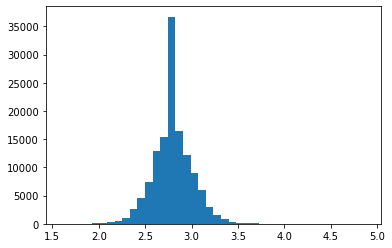

In [86]:
plt.hist(df["Life_Style_Index"], bins=40)

(array([  776.,  3804.,  8549., 14111., 19942., 23888., 24057., 19653.,
        12191.,  4691.]),
 array([1.250000e-03, 5.011250e-01, 1.001000e+00, 1.500875e+00,
        2.000750e+00, 2.500625e+00, 3.000500e+00, 3.500375e+00,
        4.000250e+00, 4.500125e+00, 5.000000e+00]),
 <BarContainer object of 10 artists>)

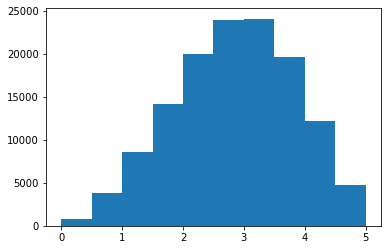

In [92]:
plt.hist(df["Customer_Rating"])

In [77]:
df.head(1)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.905,0,46,60,Female,2


### One Hot Encoding

In [96]:
cab = pd.get_dummies(df['Type_of_Cab'], prefix='Cab_Type', drop_first=True)

In [97]:
cust_monts = pd.get_dummies(df['Customer_Since_Months'], prefix='CSMonts', drop_first=True)

In [98]:
confidence = pd.get_dummies(df['Confidence_Life_Style_Index'], prefix='Confidence_Life_Style_Index', drop_first=True)

In [99]:
dest = pd.get_dummies(df['Destination_Type'], prefix='Destination_Type', drop_first=True)

In [100]:
gender = pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)

In [101]:
df_final = pd.concat([df, cab, cust_monts, confidence, dest, gender], axis=1 )
df_final.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,B,1.0,2.427690,A,A,3.90500,0,46,60,...,0,0,0,0,0,0,0,0,0,0
1,29.47,B,10.0,2.782450,B,A,3.45000,0,56,78,...,0,0,0,0,0,0,0,0,0,1
2,41.58,B,10.0,2.802064,B,E,3.50125,2,56,77,...,0,0,0,0,0,0,0,0,0,1
3,61.56,C,10.0,2.802064,B,A,3.45375,0,52,74,...,0,0,0,0,0,0,0,0,0,1
4,54.95,C,10.0,3.034530,B,A,3.40250,4,49,102,...,0,0,0,0,0,0,0,0,0,1


In [102]:
cab_test = pd.get_dummies(df_test['Type_of_Cab'], prefix='Cab_Type', drop_first=True)
cust_monts_test = pd.get_dummies(df_test['Customer_Since_Months'], prefix='CSMonts', drop_first=True)
confidence_test = pd.get_dummies(df_test['Confidence_Life_Style_Index'], prefix='Confidence_Life_Style_Index', drop_first=True)
dest_test = pd.get_dummies(df_test['Destination_Type'], prefix='Destination_Type', drop_first=True)
gender_test = pd.get_dummies(df_test['Gender'], prefix='Gender', drop_first=True)

In [103]:
df_test_final = pd.concat([df_test, cab_test, cust_monts_test, confidence_test, dest_test, gender_test], axis=1 )
df_test_final.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,9.44,A,10.0,2.57438,A,B,3.68000,2,46,63,...,0,0,0,0,0,0,0,0,0,1
1,32.15,B,10.0,2.85143,A,A,1.59375,0,49,80,...,0,0,0,0,0,0,0,0,0,0
2,10.38,C,4.0,2.70530,A,D,4.50500,0,47,74,...,0,0,0,0,0,0,0,0,0,1
3,14.94,B,6.0,2.48159,C,E,4.53000,0,43,54,...,0,0,0,0,0,0,0,0,0,1
4,32.03,B,7.0,2.81598,A,K,4.60125,3,44,56,...,0,0,0,0,0,1,0,0,0,1


In [104]:
df_final.drop(['Type_of_Cab','Customer_Since_Months','Confidence_Life_Style_Index','Destination_Type','Gender'],axis=1, inplace=True)

In [105]:
df_test_final.drop(['Type_of_Cab','Customer_Since_Months','Confidence_Life_Style_Index','Destination_Type','Gender'],axis=1, inplace=True)

In [106]:
df_final.shape

(131662, 37)

In [107]:
df_final.head()

,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type,Cab_Type_B,Cab_Type_C,Cab_Type_D,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,2.427690,3.90500,0,46,60,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29.47,2.782450,3.45000,0,56,78,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,41.58,2.802064,3.50125,2,56,77,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,61.56,2.802064,3.45375,0,52,74,3,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,3.034530,3.40250,4,49,102,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [108]:
df_test_final.head()

,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Cab_Type_B,Cab_Type_C,Cab_Type_D,Cab_Type_E,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,9.44,2.57438,3.68000,2,46,63,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,32.15,2.85143,1.59375,0,49,80,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.38,2.70530,4.50500,0,47,74,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,14.94,2.48159,4.53000,0,43,54,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,32.03,2.81598,4.60125,3,44,56,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### Test Train Split

In [109]:
X = df_final.drop('Surge_Pricing_Type',axis=1)
y = df_final['Surge_Pricing_Type']

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

## Scaling

In [117]:
from sklearn.preprocessing import StandardScaler

In [120]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [122]:
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

In [160]:
model = LogisticRegression(solver='sag',penalty='none')
model.fit(X_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
y_pred = model.predict(X_test_scaled)

In [162]:
accuracy_score(y_test, y_pred)

0.6839666827008278

In [155]:
param_grid = [
    {
        'penalty':['l1','l2', 'elasticnet', 'none'],
        'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
    ]

In [156]:
from sklearn.model_selection import GridSearchCV

In [157]:
clf = GridSearchCV(model, param_grid= param_grid, cv=3)

In [158]:
best_clf = clf.fit(X_scaled,y_train)

C:\Users\Ashwin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Ashwin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Ashwin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Ashwin\anaconda3\lib\site-pac

In [159]:
best_clf.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

### Random Forest Classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier 

In [137]:
rfc = RandomForestClassifier()

In [139]:
rfc.fit(X_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [140]:
prediction = rfc.predict(X_test_scaled)

In [129]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [141]:
accuracy_score(prediction, y_test)

0.681713461100281

In [142]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.75      0.53      0.62      8165
           2       0.64      0.81      0.72     17029
           3       0.73      0.61      0.66     14305

    accuracy                           0.68     39499
   macro avg       0.70      0.65      0.67     39499
weighted avg       0.69      0.68      0.68     39499



## Decision tree

In [ ]:
from sklearn.tree import DecisionTree

## Test Dataset

In [143]:
df_test_final.head()

,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Cab_Type_B,Cab_Type_C,Cab_Type_D,Cab_Type_E,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,9.44,2.57438,3.68000,2,46,63,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,32.15,2.85143,1.59375,0,49,80,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.38,2.70530,4.50500,0,47,74,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,14.94,2.48159,4.53000,0,43,54,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,32.03,2.81598,4.60125,3,44,56,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [144]:
test_data = scaler.fit_transform(df_test_final)
test_data

array([[-1.35988784e+00, -1.09533597e+00,  8.48098891e-01, ...,
        -2.76987802e-02, -2.43998760e-02,  6.35949753e-01],
       [-4.68735107e-01,  2.29760610e-01, -1.27695772e+00, ...,
        -2.76987802e-02, -2.43998760e-02, -1.57245127e+00],
       [-1.32300173e+00, -4.69161473e-01,  1.68844483e+00, ...,
        -2.76987802e-02, -2.43998760e-02,  6.35949753e-01],
       ...,
       [-2.44671605e-01,  1.33384036e+00, -1.23494043e+00, ...,
        -2.76987802e-02, -2.43998760e-02,  6.35949753e-01],
       [-1.31319160e+00,  3.39843981e-14, -2.53263584e-01, ...,
        -2.76987802e-02, -2.43998760e-02,  6.35949753e-01],
       [-2.40747551e-01,  9.53458006e-01, -8.07127949e-01, ...,
        -2.76987802e-02, -2.43998760e-02, -1.57245127e+00]])

In [146]:
prediction_test = model.predict(test_data)

In [151]:
df_test_id = pd.read_csv("test_VsU9xXK.csv")

In [152]:
submission = pd.DataFrame({
            "Trip_ID": df_test_id["Trip_ID"],
            "Surge_Pricing_Type": prediction_test
    })

submission.to_csv("submission.csv", index=False)

In [153]:
sub = pd.read_csv("submission.csv")

In [154]:
sub.head()

,Trip_ID,Surge_Pricing_Type
0,T0005689459,1
1,T0005689462,2
2,T0005689463,2
3,T0005689466,2
4,T0005689468,2
